# Credit Risk Analysis
## AI Pioneers

### Here, we´ll analyze a dataset containing several variables, and it´s outcome is the person credit status (default/ non default), we´ll compare different ML aproaches and select the best fit to solve the problem.
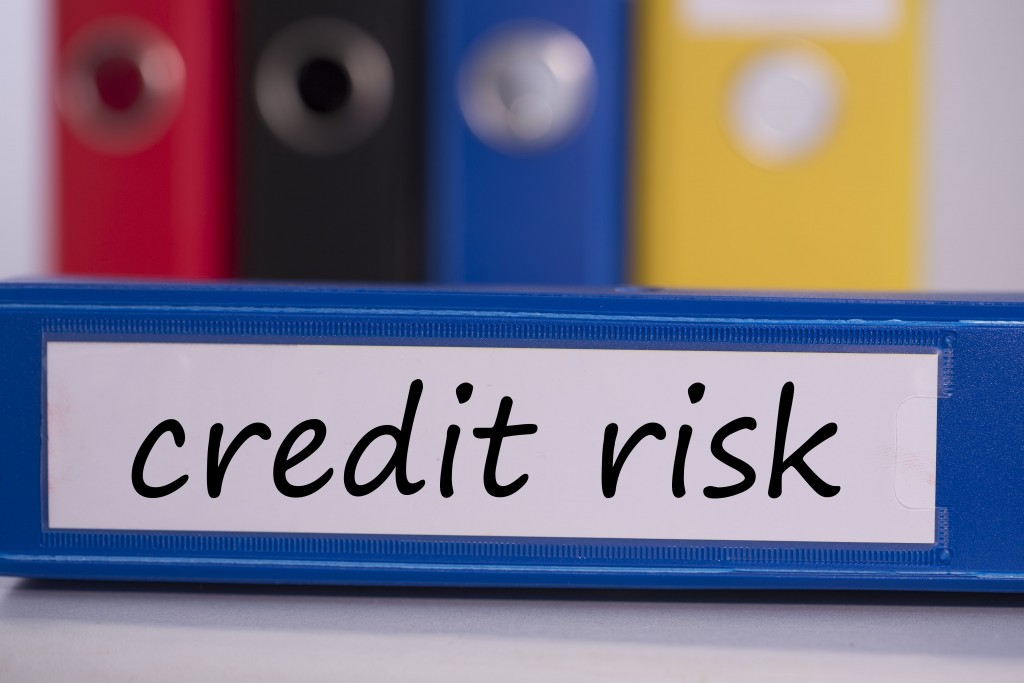


### Libraries

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
plt. style. use ('ggplot')
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LinearRegression

### Data processing

In [20]:
df = pd.read_csv('/kaggle/input/credit-risk-dataset/credit_risk_dataset.csv')
print(f"We have {df.shape[1]-1} variables and {df.shape[0]} registers in the dataset.\n")
df.head()

We have 11 variables and 32581 registers in the dataset.



,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [21]:
df = pd.get_dummies(df, columns=["person_home_ownership", "loan_intent", "loan_grade", "cb_person_default_on_file"]) 
df.dropna(inplace=True)

In [32]:
df.shape

(28638, 27)

In [22]:
# Define our X and Y data, loan_status is our target variable.
Y = df["loan_status"]
X = df.drop(columns=["loan_status"])

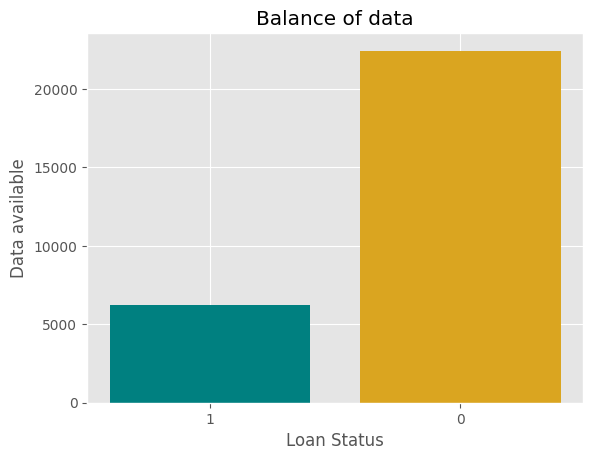

In [23]:
# Check if the data is balanced or not
ones = sum(Y)
zeros = len(Y)-ones
plt.bar(["1","0"],[ones, zeros], color= ["teal", "goldenrod"]);
plt.title("Balance of data");
plt.xlabel("Loan Status");
plt.ylabel("Data available");

In [34]:
X.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,22,59000,123.0,35000,16.02,0.59,3,False,False,False,...,False,False,False,False,True,False,False,False,False,True
1,21,9600,5.0,1000,11.14,0.10,2,False,False,True,...,False,False,True,False,False,False,False,False,True,False
2,25,9600,1.0,5500,12.87,0.57,3,True,False,False,...,False,False,False,True,False,False,False,False,True,False
3,23,65500,4.0,35000,15.23,0.53,2,False,False,False,...,False,False,False,True,False,False,False,False,True,False
4,24,54400,8.0,35000,14.27,0.55,4,False,False,False,...,False,False,False,True,False,False,False,False,False,True


<Axes: xlabel='loan_int_rate', ylabel='loan_percent_income'>

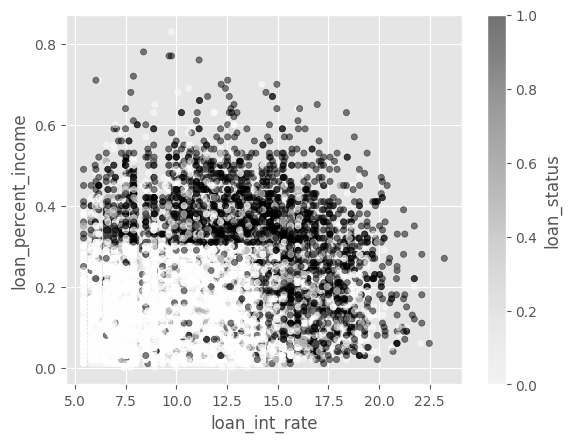

In [45]:
df.plot.scatter('loan_int_rate','loan_percent_income',c='loan_status', alpha=0.5)

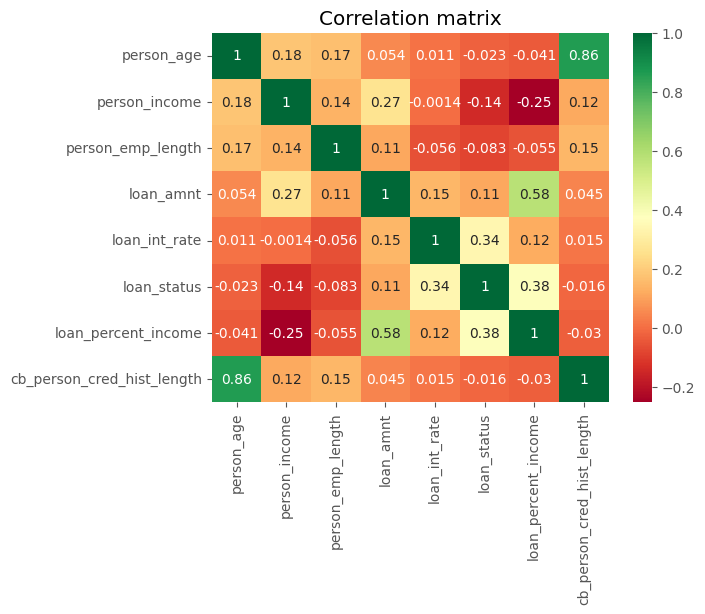

In [33]:
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True,cmap="RdYlGn");
plt.title("Correlation matrix");

In [26]:
X.apply(pd.to_numeric)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,22,59000,123.0,35000,16.02,0.59,3,False,False,False,...,False,False,False,False,True,False,False,False,False,True
1,21,9600,5.0,1000,11.14,0.10,2,False,False,True,...,False,False,True,False,False,False,False,False,True,False
2,25,9600,1.0,5500,12.87,0.57,3,True,False,False,...,False,False,False,True,False,False,False,False,True,False
3,23,65500,4.0,35000,15.23,0.53,2,False,False,False,...,False,False,False,True,False,False,False,False,True,False
4,24,54400,8.0,35000,14.27,0.55,4,False,False,False,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0.11,30,True,False,False,...,False,False,False,True,False,False,False,False,True,False
32577,54,120000,4.0,17625,7.49,0.15,19,True,False,False,...,False,True,False,False,False,False,False,False,True,False
32578,65,76000,3.0,35000,10.99,0.46,28,False,False,False,...,False,False,True,False,False,False,False,False,True,False
32579,56,150000,5.0,15000,11.48,0.10,26,True,False,False,...,False,False,True,False,False,False,False,False,True,False


In [27]:
clf = LogisticRegression(C=1e5)
clf.fit(X, Y)

LogisticRegression(C=100000.0)

In [49]:
y_pred = clf.predict(X)

<Axes: >

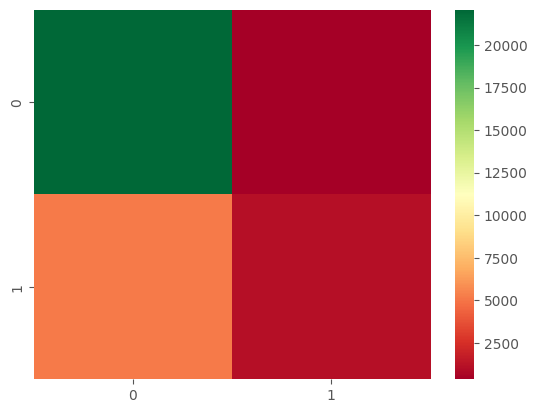

In [59]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(Y, y_pred),cmap="RdYlGn")

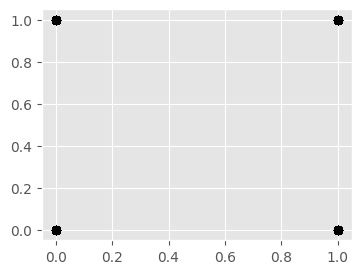

In [50]:
plt.figure(figsize=(4, 3))
plt.scatter(Y,y_pred, label="example data", color="black", zorder=20)


In [ ]:
ols = LinearRegression()
ols.fit(X, y)
plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, label="Linear Regression Model", linewidth=1)